# Get data

In [1]:
import pandas as pd

data = pd.read_excel("../data/raw/combine_пятерка.xlsx", engine="openpyxl")
data = data.rename(columns={"ID": "user_id"})
data.head()

,user_id,Экстраверсия,Доброжелательность,Сознательность,Нейротизм,Открытость опыту,age,sex,vk_friends,vk_id,...,pages,photos,subscriptions,groups,videos,count_mess,comments,likes,reposts,views
0,133,4.88,4.11,4.67,1.13,4.9,49,f,174.0,49859881.0,...,21.0,797.0,0.0,115.0,23.0,688.0,0.046512,0.829942,0.063953,53.503676
1,135,4.00,3.00,3.56,2.25,3.8,48,f,7.0,416072690.0,...,10.0,232.0,0.0,24.0,0.0,165.0,0.127273,0.066667,0.006061,10.300613
2,137,4.25,3.89,3.78,2.88,4.4,29,f,104.0,50405616.0,...,45.0,960.0,0.0,178.0,91.0,1103.0,0.058930,0.321850,0.021759,129.810345
3,145,3.50,4.44,4.33,4.38,4.3,31,f,484.0,92238581.0,...,172.0,281.0,0.0,263.0,28.0,389.0,1.195373,3.107969,0.182519,609.928571
4,148,3.25,3.78,3.67,3.25,2.9,36,m,182.0,63514116.0,...,67.0,731.0,1.0,218.0,96.0,414.0,0.277778,1.210145,0.036232,75.500000


In [17]:
age = []
for a in data.age:
        try:
            if int(a) < 100:
                age.append(int(a))
        except:
            continue
    



In [18]:
len(age)

1352

In [10]:
len(data)

1385

In [20]:
import numpy as np

np.mean(age), np.std(age)

(33.087278106508876, 8.50198815868779)

In [4]:
data.columns

Index(['user_id', 'Экстраверсия', 'Доброжелательность', 'Сознательность',
       'Нейротизм', 'Открытость опыту', 'age', 'sex', 'vk_friends', 'vk_id',
       'education', 'albums', 'audios', 'followers', 'friends', 'gifts',
       'pages', 'photos', 'subscriptions', 'groups', 'videos', 'count_mess',
       'comments', 'likes', 'reposts', 'views'],
      dtype='object')

In [2]:
# 1385 человек прошли тесты
data.shape

(1385, 26)

In [3]:
import dask.dataframe as dd

# Read CSV file in chunks
df = dd.read_csv(
    "/Users/annapalatkina/Desktop/THESIS/code/data/dataset.csv", delimiter="	"
)
df.head()

,id,post_id,network,post_text,post_type,link,full_answer,post_date,user_id,created_at,updated_at,post_time,timezone
0,2656,3068926496471162_3058708774159601,facebook,Псково-Печерский монастырь,photo,https://www.facebook.com/3068926496471162/post...,{},2020-03-10,119,2020-03-14 19:47:46,0000-00-00 00:00:00,03:59,NaN
1,2657,3068926496471162_3058700134160465,facebook,"Псковский кремль, фрески 14в. Снетогорского мо...",photo,https://www.facebook.com/3068926496471162/post...,{},2020-03-10,119,2020-03-14 19:47:46,0000-00-00 00:00:00,03:53,NaN
2,2658,3068926496471162_3055475871149558,facebook,Псков!,photo,https://www.facebook.com/3068926496471162/post...,{},2020-03-08,119,2020-03-14 19:47:46,0000-00-00 00:00:00,16:51,NaN
3,2659,3068926496471162_3055433451153800,facebook,Izborsk,photo,https://www.facebook.com/3068926496471162/post...,{},2020-03-08,119,2020-03-14 19:47:46,0000-00-00 00:00:00,16:28,NaN
4,2660,3068926496471162_3037370112960134,facebook,Летят-с-с-с,photo,https://www.facebook.com/3068926496471162/post...,{},2020-02-29,119,2020-03-14 19:47:46,0000-00-00 00:00:00,17:21,NaN


In [ ]:
# 3.330.932 текстов (из них только часть нам подойдут 
# - только те, авторы которых прошли нужные тесты)
len(df)

In [5]:
texts_needed = df[df["user_id"].isin(data.user_id.unique())]
texts_needed.head()

,id,post_id,network,post_text,post_type,link,full_answer,post_date,user_id,created_at,updated_at,post_time,timezone
2939,5595,986,vkontakte,Открытое образование - Главная страница,post,NaN,"{""id"":986,""from_id"":49859881,""owner_id"":498598...",1584471895,133,2020-03-22 19:31:17,0000-00-00 00:00:00,NaN,NaN
2940,5596,985,vkontakte,Первый день форума «Бережливое управление 2.0»,post,NaN,"{""id"":985,""from_id"":49859881,""owner_id"":498598...",1582232071,133,2020-03-22 19:31:17,0000-00-00 00:00:00,NaN,NaN
2941,5597,984,vkontakte,NaN,post,NaN,"{""id"":984,""from_id"":49859881,""owner_id"":498598...",1580327001,133,2020-03-22 19:31:17,0000-00-00 00:00:00,NaN,NaN
2942,5598,983,vkontakte,NaN,post,NaN,"{""id"":983,""from_id"":49859881,""owner_id"":498598...",1579368346,133,2020-03-22 19:31:17,0000-00-00 00:00:00,NaN,NaN
2943,5599,982,vkontakte,Есть контакт | Центры «Мои Документы» Липецкой...,post,NaN,"{""id"":982,""from_id"":49859881,""owner_id"":498598...",1579199764,133,2020-03-22 19:31:17,0000-00-00 00:00:00,NaN,NaN


In [ ]:
len(texts_needed)

In [ ]:
texts_needed = texts_needed[["user_id", "post_text"]].dropna(subset="post_text")
texts_needed_pandas = texts_needed.compute()  # To pandas dataframe
texts_needed_pandas.to_csv("../data/interim/df_userid_posttext.csv", index=False)

In [5]:
d = pd.read_csv('../data/interim/df_userid_posttext.csv')
d

,user_id,post_text
0,133,Открытое образование - Главная страница
1,133,Первый день форума «Бережливое управление 2.0»
2,133,Есть контакт | Центры «Мои Документы» Липецкой...
3,133,До аэропорта «Липецк» будет ездить бесплатный ...
4,133,https://vk.com/wall-171900971_843
...,...,...
249973,9087,Друзья! Помогите этой работе победить в конкур...
249974,9087,"Лариса, нажми на картинку и помоги мне получит..."
249975,9087,Давай сажать цветочки вместе со мной.https://v...
249976,9087,Сказать Спасибо! отправителю:vkontakte.ru/app1...


In [ ]:
# join dataframes on 'user_id' column
needed_columns = [
    "user_id",
    "Экстраверсия",
    "Доброжелательность",
    "Сознательность",
    "Нейротизм",
    "Открытость опыту",
]

dataset = pd.merge(texts_needed_pandas, data[needed_columns], on="user_id", how="inner")

dataset.head()

,user_id,post_text,Экстраверсия,Доброжелательность,Сознательность,Нейротизм,Открытость опыту
0,133,Открытое образование - Главная страница,4.88,4.11,4.67,1.13,4.9
1,133,Первый день форума «Бережливое управление 2.0»,4.88,4.11,4.67,1.13,4.9
2,133,Есть контакт | Центры «Мои Документы» Липецкой...,4.88,4.11,4.67,1.13,4.9
3,133,До аэропорта «Липецк» будет ездить бесплатный ...,4.88,4.11,4.67,1.13,4.9
4,133,https://vk.com/wall-171900971_843,4.88,4.11,4.67,1.13,4.9


In [ ]:
dataset.to_csv('../data/interim/df_texts_ocean.csv',index=False)

# Data preprocessing

In [1]:
import pandas as pd
dataset = pd.read_csv('../data/interim/df_texts_ocean.csv')

In [2]:
dataset.head()

,user_id,post_text,Экстраверсия,Доброжелательность,Сознательность,Нейротизм,Открытость опыту
0,133,Открытое образование - Главная страница,4.88,4.11,4.67,1.13,4.9
1,133,Первый день форума «Бережливое управление 2.0»,4.88,4.11,4.67,1.13,4.9
2,133,Есть контакт | Центры «Мои Документы» Липецкой...,4.88,4.11,4.67,1.13,4.9
3,133,До аэропорта «Липецк» будет ездить бесплатный ...,4.88,4.11,4.67,1.13,4.9
4,133,https://vk.com/wall-171900971_843,4.88,4.11,4.67,1.13,4.9


In [3]:
dataset['length'] = dataset.post_text.apply(lambda x: len(x.split()))

In [4]:
dataset['length'].describe()

count    249978.000000
mean         13.881086
std          43.610343
min           0.000000
25%           3.000000
50%           6.000000
75%          12.000000
max        2756.000000
Name: length, dtype: float64

<Axes: ylabel='Density'>

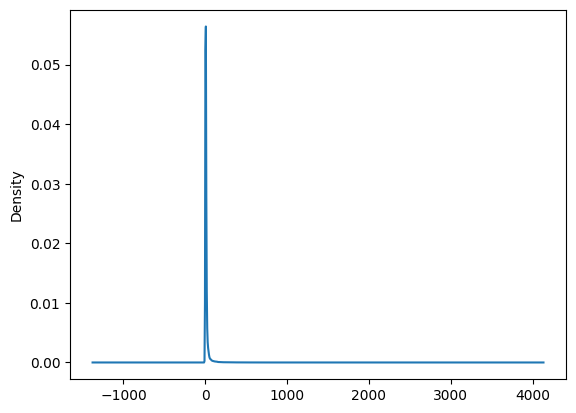

In [17]:
dataset['length'].plot(kind='kde')

<Axes: ylabel='Frequency'>

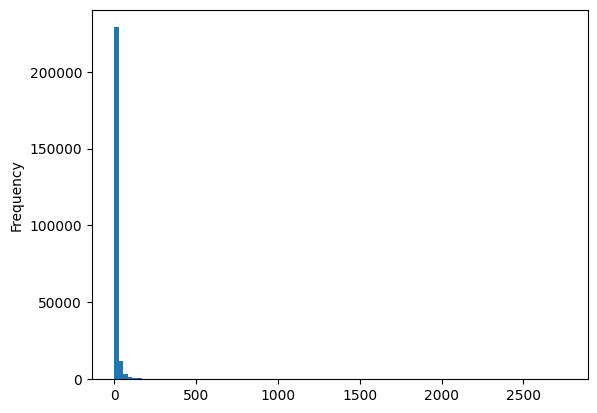

In [16]:
dataset['length'].plot.hist(bins=100)

In [5]:
len(dataset.query('length != 0'))

249972

/var/folders/f1/w7d0x47j0qq9jn7k7vhjrkzh0000gn/T/ipykernel_97427/3873042089.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(df, x=COL, fill=True, palette=sns.color_palette('bright')[1:2], ax=ax)


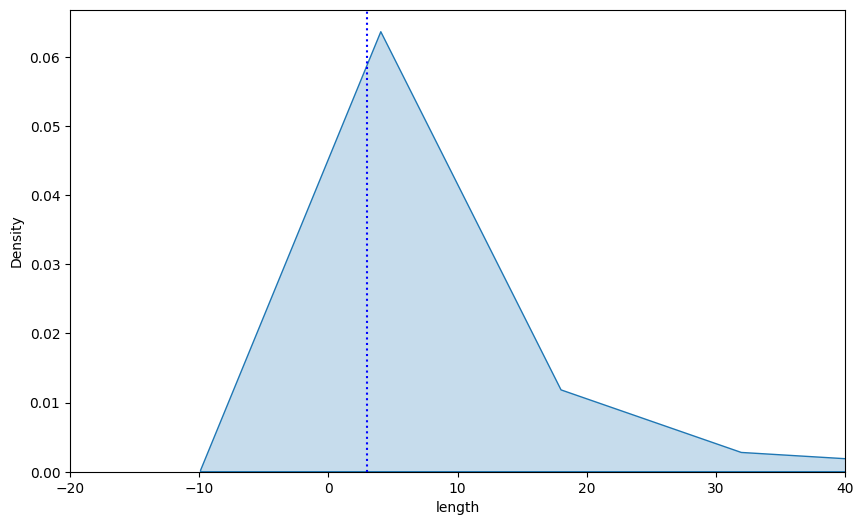

In [21]:
# only one line may be specified; full height
df = dataset.query('length != 0')
COL = 'length'
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
fig, ax = plt.subplots()
sns.kdeplot(df, x=COL, fill=True, palette=sns.color_palette('bright')[1:2], ax=ax)
plt.axvline(x = df[COL].mode().values[0], color = 'b', label = 'axvline - full height', linestyle=':')
ax.set_xlim(-20,40)
plt.show()

In [11]:
for text in dataset.post_text.head(10):
    print(text)
    print("------------------------------------------------")

Открытое образование - Главная страница
------------------------------------------------
Первый день форума «Бережливое управление 2.0»
------------------------------------------------
Есть контакт | Центры «Мои Документы» Липецкой области
------------------------------------------------
До аэропорта «Липецк» будет ездить бесплатный автобус
------------------------------------------------
https://vk.com/wall-171900971_843
------------------------------------------------
Новость
------------------------------------------------
Сотрудники администрации ознакомились с успешными практиками бережливого производства — Администрация городского округа город Елец
------------------------------------------------
Агенство автотранспорта Липецкой области сэкономит 8 млн рублей в год
------------------------------------------------
Поделились знаниями | Центры «Мои Документы» Липецкой области
------------------------------------------------
"I Didn't Come This Far To Only Come This Far (Mot…": http

In [12]:
import nltk

nltk.download("stopwords")

import re
import emoji
from nltk.corpus import stopwords
from pymystem3 import Mystem

# from string import punctuation

# Create lemmatizer and stopwords list
mystem = Mystem()
russian_stopwords = stopwords.words("russian")
punctuation = "\"#$%&'*+,-./:;<=>?@[\\]^_`{|}~«»…—"

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annapalatkina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def clean_text(text):
    # приводим текст к нижнему регистру
    text = text.lower()
    # создаем регулярное выражение для удаления лишних символов
    #regular = r"[\*+\#+\№\"\-+\+\=+\?+\&\^\.+\;\,+\>+\(\)\/+\:\\+]"
    # регулярное выражение для замены ссылки на "URL"
    regular_url = r"(http\S+)|(www\S+)|([\w\d]+www\S+)|([\w\d]+http\S+)"
    # удаляем лишние символы
    #text = re.sub(regular, "", text)
    # заменяем ссылки на "URL"
    text = re.sub(regular_url, r"URL", text)
    # заменяем числа и цифры на ' NUM '
    text = re.sub(r"(\d+\s\d+)|(\d+)", " NUM ", text)
    # удаляем лишние пробелы
    text = re.sub(r"\s+", " ", text)
    # удвляем пунктуацию
    text = text.translate(str.maketrans("", "", punctuation))
    text = emoji.demojize(text, language="en")
    # возвращаем очищенные данные
    return text


# Preprocess function
def preprocess_text_stopwords(text):
    text = clean_text(text)
    tokens = mystem.lemmatize(text.lower())
    tokens = [
        token
        for token in tokens
        if token not in russian_stopwords
        and token != " "
        and token.strip() not in punctuation
    ]
    text = " ".join(tokens)
    return text

def preprocess_text(text):
    text = clean_text(text)
    tokens = mystem.lemmatize(text.lower())
    tokens = [
        token
        for token in tokens
        if token != " "
        and token.strip() not in punctuation
    ]
    text = " ".join(tokens)
    return text

In [16]:
# Only clean NOT lemmatize
dataset["tokens"] = dataset.post_text.apply(lambda text: clean_text(str(text)))
dataset.head()

,user_id,post_text,Экстраверсия,Доброжелательность,Сознательность,Нейротизм,Открытость опыту,tokens
0,133,Открытое образование - Главная страница,4.88,4.11,4.67,1.13,4.9,открытое образование главная страница
1,133,Первый день форума «Бережливое управление 2.0»,4.88,4.11,4.67,1.13,4.9,первый день форума бережливое управление NUM ...
2,133,Есть контакт | Центры «Мои Документы» Липецкой...,4.88,4.11,4.67,1.13,4.9,есть контакт центры мои документы липецкой об...
3,133,До аэропорта «Липецк» будет ездить бесплатный ...,4.88,4.11,4.67,1.13,4.9,до аэропорта липецк будет ездить бесплатный ав...
4,133,https://vk.com/wall-171900971_843,4.88,4.11,4.67,1.13,4.9,URL


In [ ]:
dataset.to_csv('../data/processed/df_tokens_ocean_NOT_stemmed.csv',index=False)

In [ ]:
dataset["tokens"] = dataset.post_text.apply(lambda text: preprocess_text(str(text)))
dataset.head()

,user_id,post_text,Экстраверсия,Доброжелательность,Сознательность,Нейротизм,Открытость опыту,tokens
0,133,Открытое образование - Главная страница,4.88,4.11,4.67,1.13,4.9,открытый образование главный страница
1,133,Первый день форума «Бережливое управление 2.0»,4.88,4.11,4.67,1.13,4.9,первый день форум бережливый управление num num
2,133,Есть контакт | Центры «Мои Документы» Липецкой...,4.88,4.11,4.67,1.13,4.9,контакт центр документ липецкий область
3,133,До аэропорта «Липецк» будет ездить бесплатный ...,4.88,4.11,4.67,1.13,4.9,аэропорт липецк ездить бесплатный автобус
4,133,https://vk.com/wall-171900971_843,4.88,4.11,4.67,1.13,4.9,url


In [ ]:
for text in dataset.tokens.head(10):
    print(text)
    print('------------------------------------------------')

открытый образование главный страница
------------------------------------------------
первый день форум бережливый управление num num
------------------------------------------------
контакт центр документ липецкий область
------------------------------------------------
аэропорт липецк ездить бесплатный автобус
------------------------------------------------
url
------------------------------------------------
новость
------------------------------------------------
сотрудник администрация ознакомляться успешный практика бережливый производство администрация городской округ город елец
------------------------------------------------
агенство автотранспорт липецкий область сэкономить num млн рубль год
------------------------------------------------
поделиться знание центр документ липецкий область
------------------------------------------------
i didnt come this far to only come this far  ( mot url заряжать !
------------------------------------------------


In [ ]:
len(dataset)

249978

In [ ]:
dataset = dataset.dropna(subset='tokens')
len(dataset)

248487

In [ ]:
dataset.to_csv('../data/processed/df_tokens_ocean.csv', index=False)

# Remove names and surnames

In [1]:
import pandas as pd 

dataset = pd.read_csv('../data/processed/df_tokens_ocean.csv')
dataset.head()

,user_id,post_text,Экстраверсия,Доброжелательность,Сознательность,Нейротизм,Открытость опыту,tokens,tokens_no_name
0,133,Открытое образование - Главная страница,4.88,4.11,4.67,1.13,4.9,открытый образование главный страница,открытый образование главный страница
1,133,Первый день форума «Бережливое управление 2.0»,4.88,4.11,4.67,1.13,4.9,первый день форум бережливый управление num num,первый день форум бережливый управление num num
2,133,Есть контакт | Центры «Мои Документы» Липецкой...,4.88,4.11,4.67,1.13,4.9,контакт центр документ липецкий область,контакт центр документ липецкий область
3,133,До аэропорта «Липецк» будет ездить бесплатный ...,4.88,4.11,4.67,1.13,4.9,аэропорт липецк ездить бесплатный автобус,аэропорт липецк ездить бесплатный автобус
4,133,https://vk.com/wall-171900971_843,4.88,4.11,4.67,1.13,4.9,url,url


In [2]:
names = pd.read_csv('../data/external/База данных имен и фамилий в формате CSV/russian_names.csv', delimiter=';')
surnames = pd.read_csv('../data/external/База данных имен и фамилий в формате CSV/russian_surnames.csv', delimiter=';')

In [3]:
names.head()

,ID,Name,Sex,PeoplesCount,WhenPeoplesCount,Source
0,19903,Аалия,Ж,13,23.06.2016 13:39:41,myData.biz
1,19904,Аанжелла,Ж,0,23.06.2016 13:39:46,myData.biz
2,19905,Аба,Ж,1000,23.06.2016 13:39:55,myData.biz
3,19906,Абав,Ж,0,23.06.2016 13:40:02,myData.biz
4,19907,Абам,Ж,32,23.06.2016 13:40:11,myData.biz


In [4]:
surnames.head()

,ID,Surname,Sex,PeoplesCount,WhenPeoplesCount,Source
0,1,Аалферов,NaN,0,30.06.2016 17:25:47,myData.biz
1,2,Аалферова,NaN,1,21.05.2016 14:21:30,myData.biz
2,3,Ааль,NaN,95,21.05.2016 14:21:39,myData.biz
3,4,Ааман,NaN,24,21.05.2016 14:21:49,myData.biz
4,5,Аамана,NaN,0,20.06.2016 0:50:51,myData.biz


In [5]:
import ipywidgets as widgets
widgets.IntSlider()

IntSlider(value=0)

In [6]:
from pandarallel import pandarallel
import re

pandarallel.initialize(progress_bar=True)

def replace_names(text):
    text = re.sub("|".join(r"\b{}\b".format(t.lower()) for t in names.Name),'Имя', text)
    text = re.sub("|".join(r"\b{}\b".format(t.lower()) for t in surnames.Surname),'Фамилия', text)
    return text

tokens_no_names = dataset['tokens'].parallel_apply(replace_names)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [7]:
dataset['tokens_no_name'] = tokens_no_names
dataset.head()

,user_id,post_text,Экстраверсия,Доброжелательность,Сознательность,Нейротизм,Открытость опыту,tokens,tokens_no_name
0,133,Открытое образование - Главная страница,4.88,4.11,4.67,1.13,4.9,открытый образование главный страница,открытый образование Фамилия страница
1,133,Первый день форума «Бережливое управление 2.0»,4.88,4.11,4.67,1.13,4.9,первый день форум бережливый управление num num,первый день форум бережливый управление num num
2,133,Есть контакт | Центры «Мои Документы» Липецкой...,4.88,4.11,4.67,1.13,4.9,контакт центр документ липецкий область,контакт центр документ Фамилия область
3,133,До аэропорта «Липецк» будет ездить бесплатный ...,4.88,4.11,4.67,1.13,4.9,аэропорт липецк ездить бесплатный автобус,аэропорт липецк ездить бесплатный автобус
4,133,https://vk.com/wall-171900971_843,4.88,4.11,4.67,1.13,4.9,url,url


In [10]:
dataset.to_csv('../data/processed/df_tokens_ocean.csv', index=False)

In [11]:
dataset

,user_id,post_text,Экстраверсия,Доброжелательность,Сознательность,Нейротизм,Открытость опыту,tokens,tokens_no_name
0,133,Открытое образование - Главная страница,4.88,4.11,4.67,1.13,4.9,открытый образование главный страница,открытый образование Фамилия страница
1,133,Первый день форума «Бережливое управление 2.0»,4.88,4.11,4.67,1.13,4.9,первый день форум бережливый управление num num,первый день форум бережливый управление num num
2,133,Есть контакт | Центры «Мои Документы» Липецкой...,4.88,4.11,4.67,1.13,4.9,контакт центр документ липецкий область,контакт центр документ Фамилия область
3,133,До аэропорта «Липецк» будет ездить бесплатный ...,4.88,4.11,4.67,1.13,4.9,аэропорт липецк ездить бесплатный автобус,аэропорт липецк ездить бесплатный автобус
4,133,https://vk.com/wall-171900971_843,4.88,4.11,4.67,1.13,4.9,url,url
...,...,...,...,...,...,...,...,...,...
248482,9087,Друзья! Помогите этой работе победить в конкур...,2.50,3.11,3.56,3.13,2.7,друг ! помогать работа побеждать конкурс ))\n,Имя ! помогать Фамилия побеждать конкурс ))\n
248483,9087,"Лариса, нажми на картинку и помоги мне получит...",2.50,3.11,3.56,3.13,2.7,лариса нажимать картинка помогать получать url,Имя нажимать картинка помогать получать url
248484,9087,Давай сажать цветочки вместе со мной.https://v...,2.50,3.11,3.56,3.13,2.7,давать сажать цветочек вместе мнойurl,давать сажать цветочек вместе мнойurl
248485,9087,Сказать Спасибо! отправителю:vkontakte.ru/app1...,2.50,3.11,3.56,3.13,2.7,сказать спасибо ! отправителюvkontakteruapp nu...,сказать Фамилия ! отправителюvkontakteruapp nu...
